<a href="https://colab.research.google.com/github/frankzamma/AntiPiracyPlatform/blob/main/Notebook/SARSA_lambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training e Test con SARSA(λ)
In questo notebook è presente il training di Q*Bert sfruttando l'algoritmo SARSA(λ)

## Download Repository

Download della repository per utilizzare le classi create su Google Colab

In [1]:
from google.colab import userdata

In [2]:
! git clone https://{userdata.get('TokenGithub')}"@github.com/amigli/Q-Bert_RL.git"

Cloning into 'Q-Bert_RL'...
remote: Enumerating objects: 382, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 382 (delta 65), reused 34 (delta 17), pack-reused 281 (from 1)
Receiving objects: 100% (382/382), 7.55 MiB | 14.06 MiB/s, done.
Resolving deltas: 100% (228/228), done.


In [3]:
%cd Q-Bert_RL

/content/Q-Bert_RL


## Installazione dei requirements

Vengono installati tutti i moduli necessari dal file requirements.txt

In [4]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 958.1/958.1 kB 24.4 MB/s eta 0:00:00


In [5]:
!pip install ale-py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 44.6 MB/s eta 0:00:00


In [6]:
!pip install moviepy

## Training

In [10]:
from Algorithms.QBertAgent_SARSA_lambda import SARSALambdaAgent
import gymnasium as gym
import ale_py
from tqdm.notebook import tqdm
from gymnasium.wrappers import RecordEpisodeStatistics, RecordVideo
from EnvironmentWrappers.ObsRewardWrapper import ObsRewardWrapper

gym.register_envs(ale_py)

# hyperparameters
step_size = 0.01
n_episodes = 500
start_epsilon = 1.0
epsilon_decay = start_epsilon / (n_episodes / 2)  # reduce the exploration over time
final_epsilon = 0.1

## TRAINING
env = gym.make("ALE/Qbert-ram-v5")
env =  ObsRewardWrapper(env)
env = RecordEpisodeStatistics(env, buffer_length=n_episodes)
agent = SARSALambdaAgent(
    env=env,
    step_size=step_size,
    initial_epsilon=start_epsilon,
    epsilon_decay=epsilon_decay,
    final_epsilon=final_epsilon,
)

for episode in tqdm(range(n_episodes)):
    obs, info = env.reset()
    done = False
    obs = tuple(obs)
    # print("Episode:" + str(episode))
    total_reward = 0
    action = agent.get_action(obs, True)

    while not done:
        # print(action)
        next_obs, reward, terminated, truncated, info = env.step(action)
        next_obs = tuple(next_obs)
        # print("Reward: " + str(reward))
        # print("action: " + str(action))
        next_action = agent.get_action(next_obs, True)
        total_reward += reward
        # update the agent
        agent.update(obs, action, reward, terminated, next_obs, next_action)

        done = terminated or truncated
        obs = next_obs
        action = next_action

    agent.decay_epsilon()
    # print(total_reward)

env.close()

  0%|          | 0/500 [00:00<?, ?it/s]

KeyboardInterrupt: 

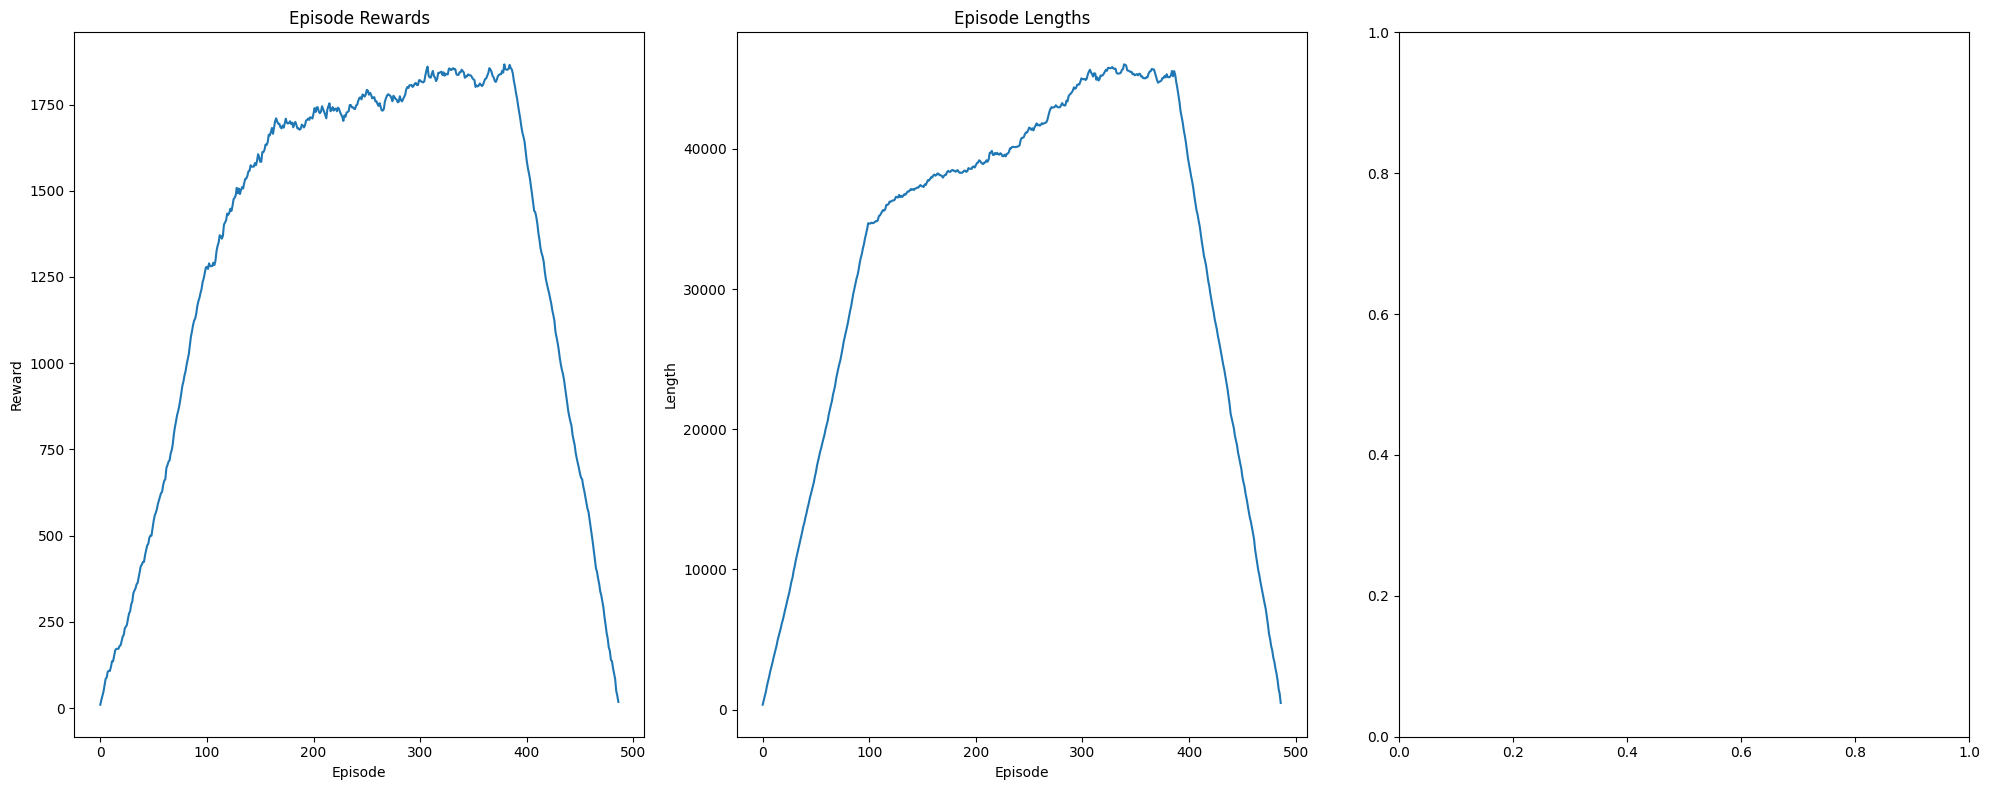

In [11]:
from matplotlib import pyplot as plt
import numpy as np

# visualize the episode rewards, episode length and training error in one figure
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# np.convolve will compute the rolling mean for 100 episodes

axs[0].plot(np.convolve(env.return_queue, np.ones(100)))
axs[0].set_title("Episode Rewards")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Reward")

axs[1].plot(np.convolve(env.length_queue, np.ones(100)))
axs[1].set_title("Episode Lengths")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Length")

#axs[2].plot(np.convolve(agent.training_error, np.ones(100)))
#axs[2].set_title("Training Error")
#axs[2].set_xlabel("Episode")
#axs[2].set_ylabel("Temporal Difference")

plt.tight_layout()
plt.show()

# Utilizzo Policy

Di seguito viente utilizzata la policy precedentemente calcolata per registrare degli episodi

In [12]:
num_eval_episodes = 10

env = gym.make("ALE/Qbert-ram-v5", render_mode="rgb_array")
env =  ObsRewardWrapper(env)
env = RecordVideo(env, video_folder="videos_first", name_prefix="eval",
                  episode_trigger=lambda x: True)
env = RecordEpisodeStatistics(env, buffer_length=num_eval_episodes)


for episode_num in range(num_eval_episodes):
    #print(f"Stato osservato: {obs}")  # Debug per lo stato osservato
    #print(f"Valori Q per lo stato {obs}: {agent.q_values[obs]}")  # Debug per i valori Q
    obs, info = env.reset()
    done = False
    obs = tuple(obs)
    while not done:
        action = agent.get_action(obs, False)
        next_obs, reward, terminated, truncated, info = env.step(action)
        obs = tuple(next_obs)
        done = terminated or truncated
env.close()

print(f'Episode time taken: {env.time_queue}')
print(f'Episode total rewards: {env.return_queue}')
print(f'Episode lengths: {env.length_queue}')

print("Training terminato")

Episode time taken: deque([0.326108, 0.329531, 0.315609, 0.320442, 0.307597, 0.350197, 0.315272, 0.353349, 0.387294, 0.308897], maxlen=10)
Episode total rewards: deque([18.0, 22.0, 22.0, 22.0, 22.0, 16.0, 20.0, 16.0, 16.0, 20.0], maxlen=10)
Episode lengths: deque([500, 500, 500, 500, 501, 583, 498, 583, 635, 500], maxlen=10)
Training terminato


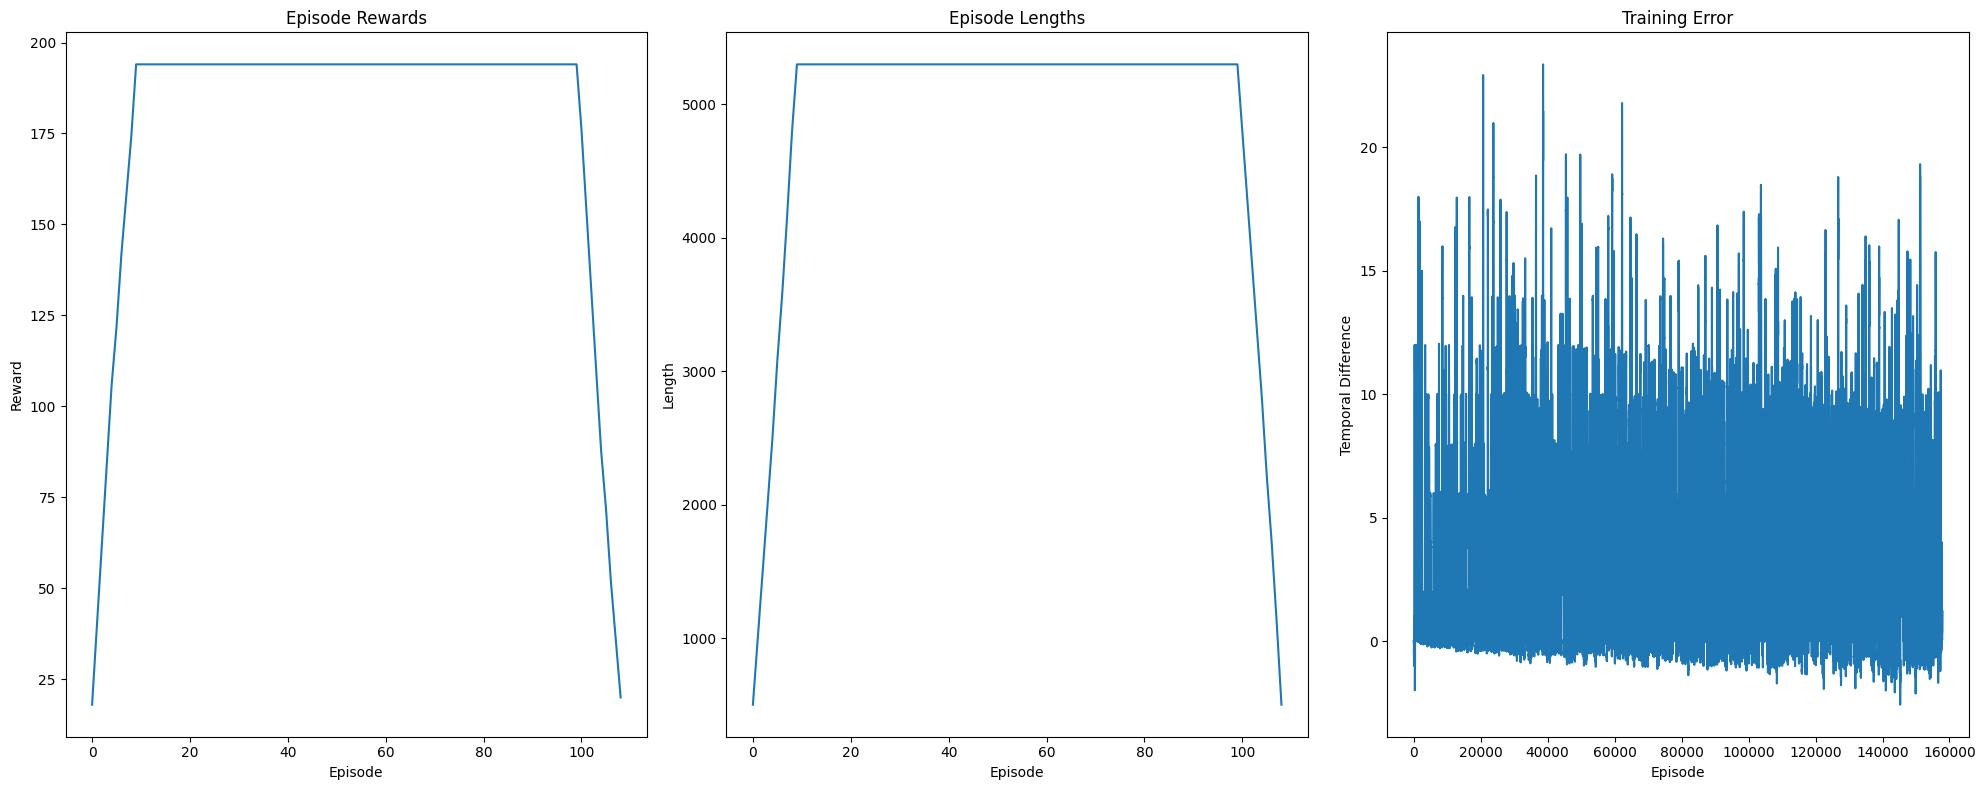

In [13]:
from matplotlib import pyplot as plt
import numpy as np

# visualize the episode rewards, episode length and training error in one figure
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# np.convolve will compute the rolling mean for 100 episodes

axs[0].plot(np.convolve(env.return_queue, np.ones(100)))
axs[0].set_title("Episode Rewards")
axs[0].set_xlabel("Episode")
axs[0].set_ylabel("Reward")

axs[1].plot(np.convolve(env.length_queue, np.ones(100)))
axs[1].set_title("Episode Lengths")
axs[1].set_xlabel("Episode")
axs[1].set_ylabel("Length")

axs[2].plot(np.convolve(agent.training_error, np.ones(100)))
axs[2].set_title("Training Error")
axs[2].set_xlabel("Episode")
axs[2].set_ylabel("Temporal Difference")

plt.tight_layout()
plt.show()

In [14]:
agent.save_q_values()